In [2]:
# encoding=utf8

# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')
plt.close("all")

In [3]:
labels = pd.read_csv('train_labels.csv')
values = pd.read_csv('train_values.csv',usecols=['building_id','geo_level_1_id','geo_level_2_id','geo_level_3_id','count_floors_pre_eq','age','area_percentage','height_percentage','land_surface_condition','foundation_type'])

In [4]:
#GEO LEVEL   : Region geografica donde se establece la edificacion
#GEO LEVEL 1 : 0-30
#GEO LEVEL 2 : 0-1427
#GEO LEVEL 3 : 0-12567

#4-COUNT FLOORS: Cantidad de pisos de la edificacion

#5-AGE: Anitiguedad de la edificacion

#6-AREA PERCENTAGE: Superficie normalizada que ocupa la edificacion

#7-HEIGHT PERCENTAGE: Altura normalizada de la edificacion

#8-LAND SURFACE CONDITION: Condicion de la superficie donde se construyo

#9-FOUNDATION TYPE: Tipo de cimiento de la edificacion

#10-DAMAGE GRADE: Nivel de daño en la edificacion

In [5]:
values = values.merge(labels, on='building_id')

In [6]:
values['height_percentage'].describe()

count             260,601.00
mean                    5.43
std                     1.92
min                     2.00
25%                     4.00
50%                     5.00
75%                     6.00
max                    32.00
Name: height_percentage, dtype: float64

Text(0.5, 0, 'Pisos')

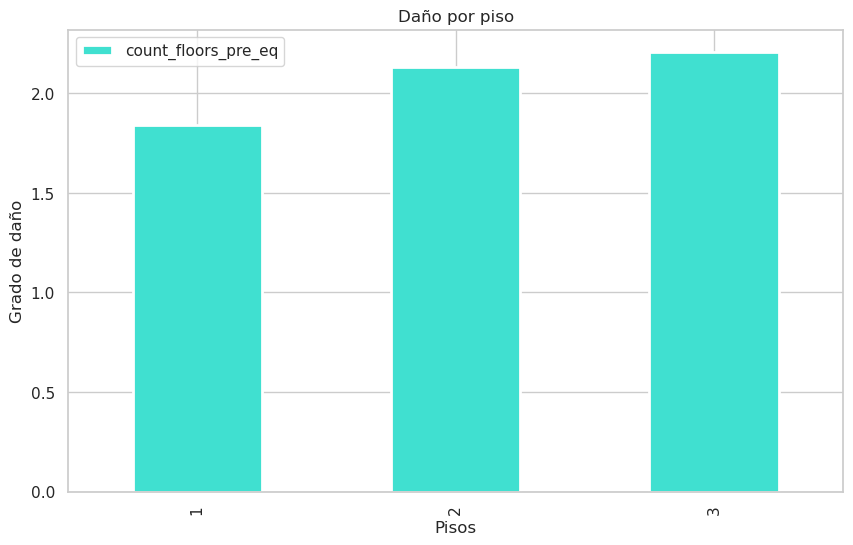

In [7]:
danio_por_pisos = values.groupby('damage_grade').agg({'count_floors_pre_eq':'mean'})
danio_por_pisos.plot(kind='bar',title='Daño por piso',linewidth=2,figsize=(10,6),color='turquoise');
ax=plt.gca()
ax.set_ylabel('Grado de daño')
ax.set_xlabel('Pisos')

In [8]:
geo1 = values.groupby('damage_grade').agg({'geo_level_1_id':'mean'})

In [9]:
geo2 = values.groupby('damage_grade').agg({'geo_level_2_id':'mean'})

In [10]:
geo3 = values.groupby('damage_grade').agg({'geo_level_3_id':'mean'})

In [11]:
geo = geo1.merge(geo2,on='damage_grade')

In [12]:
geo = geo.merge(geo3,on='damage_grade')

In [13]:
geo.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id
damage_grade,,,
1,17.32,652.93,"6,278.00"
2,13.37,698.23,"6,219.95"
3,13.82,719.77,"6,316.54"


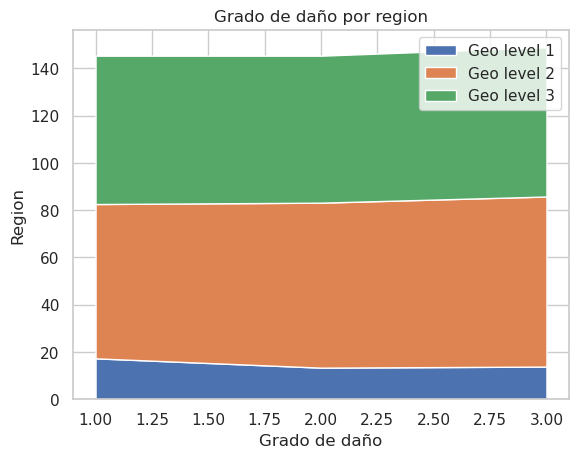

In [14]:
damage_grade = [1,2,3]
geo_levels = {
    'Geo level 1': [17.318261, 13.366986, 13.822445],
    'Geo level 2': [652.934684/10, 698.234205/10, 719.770323/10],
    'Geo level 3': [6277.995582/100, 6219.954155/100, 6316.542893/100]
}

fig, ax = plt.subplots()
ax.stackplot(damage_grade, geo_levels.values(),
             labels=geo_levels.keys())
ax.legend(loc='upper right')
ax.set_title('Grado de daño por region')
ax.set_xlabel('Grado de daño')
ax.set_ylabel('Region')

plt.show()

In [15]:
danio_por_antiguedad = values.groupby('age').agg({'damage_grade':'mean'}).reset_index()
danio_por_antiguedad = danio_por_antiguedad.loc[(danio_por_antiguedad['age'] <= 200)]

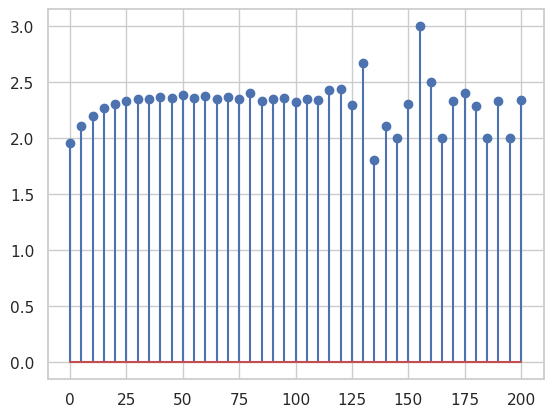

In [16]:
x = danio_por_antiguedad['age']
y = danio_por_antiguedad['damage_grade']

ax.set_title('Grado de daño por region')
ax.set_xlabel('Antiguedad')
ax.set_ylabel('Grado de daño')

plt.stem(x, y)
plt.show()

In [17]:
danio_por_altura = values.groupby('height_percentage').agg({'damage_grade':'mean'}).reset_index()


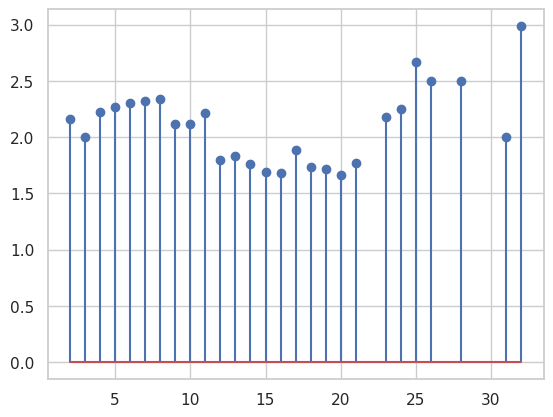

In [18]:
x = danio_por_altura['height_percentage']
y = danio_por_altura['damage_grade']

ax.set_title('Grado de daño por region')
ax.set_xlabel('Antiguedad')
ax.set_ylabel('Grado de daño')

plt.stem(x, y)
plt.show()

In [19]:
danio_por_tamanio = values.groupby('area_percentage').agg({'damage_grade':'mean'})
danio_por_tamanio

,damage_grade
area_percentage,
1,2.19
2,2.21
3,2.28
4,2.26
5,2.31
...,...
85,2.25
86,1.40
90,2.00


Text(0.5, 0, 'Tamaño')

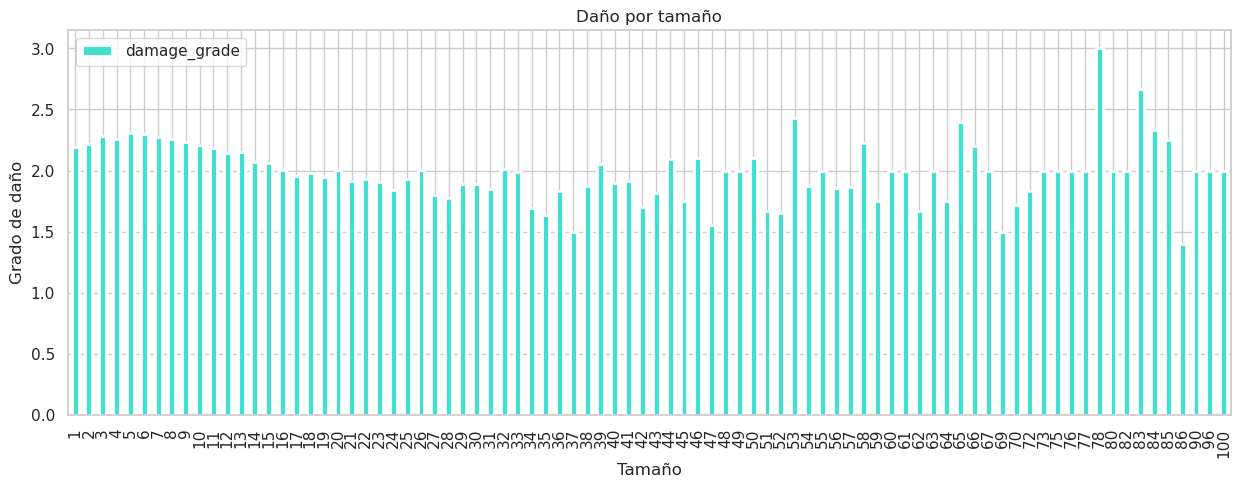

In [20]:
danio_por_tamanio.plot(kind='bar',title='Daño por tamaño',linewidth=2,figsize=(15,5),color='turquoise');
ax=plt.gca()
ax.set_ylabel('Grado de daño')
ax.set_xlabel('Tamaño')

# Analisis por ubicacion geografica (geo level 1,2,3)

In [21]:
values['geo_level_1_id'].value_counts()

6     24381
26    22615
10    22079
17    21813
8     19080
7     18994
20    17216
21    14889
4     14568
27    12532
13     9608
11     8220
3      7540
22     6252
25     5624
16     4332
0      4011
9      3958
12     3194
18     3189
1      2701
5      2690
30     2686
15     2320
14     1714
24     1310
23     1121
2       931
29      396
19      372
28      265
Name: geo_level_1_id, dtype: int64

In [22]:
# Analizo las 10 regiones con mayor cantidad de edificios dañados
top10MasDañadas = dict(values["geo_level_1_id"].value_counts().nlargest(10))
id_mas_dañadas = sorted(list(top10MasDañadas.keys()))
id_mas_dañadas

[4, 6, 7, 8, 10, 17, 20, 21, 26, 27]

In [23]:
values['cantidad'] = 1
daño_por_lugar = values.groupby(['geo_level_1_id','damage_grade']).agg({'cantidad':'count'})
daño_por_lugar.reset_index(inplace=True)
daño_por_lugar

,geo_level_1_id,damage_grade,cantidad
0,0,1,337
1,0,2,3075
2,0,3,599
3,1,1,411
4,1,2,1985
...,...,...,...
87,29,2,349
88,29,3,39
89,30,1,252
90,30,2,2127


In [24]:
id_bajo = []
id_medio = []
id_alto = []
for i in range (0,len(daño_por_lugar)):
    if(daño_por_lugar.loc[i,'damage_grade'] == 1):
        id_bajo.append(daño_por_lugar.loc[i,'cantidad'])
    elif(daño_por_lugar.loc[i,'damage_grade'] == 2):
        id_medio.append(daño_por_lugar.loc[i,'cantidad'])
    elif(daño_por_lugar.loc[i,'damage_grade'] == 3):
        id_alto.append(daño_por_lugar.loc[i,'cantidad'])
len(id_medio)
        
for i in range (0,10):
    id_medio.pop(i)
    id_bajo.pop(i)
    id_alto.pop(i)

id_alto.pop()
id_medio.pop()
len(id_bajo)
#len(id_bajo)
#len(id_alto)


20

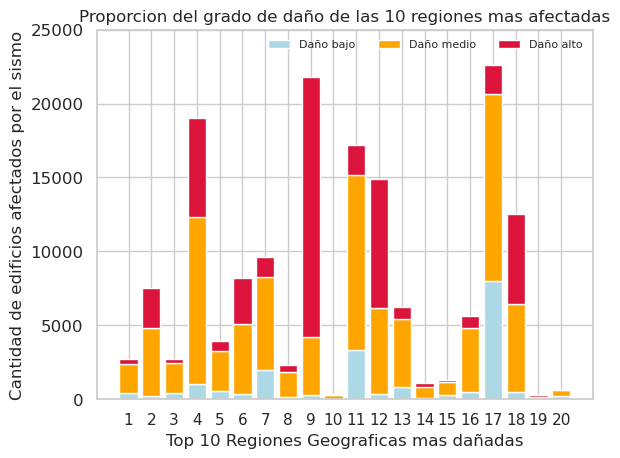

In [25]:
x = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']
header = ["Daño bajo","Daño medio","Daño alto"]
dataset= [id_bajo,id_medio,id_alto]

p1 = plt.bar(x, dataset[0], color='lightblue',label = 'Daño bajo')
p2 = plt.bar(x, dataset[1], bottom=dataset[0], color='orange',label = 'Daño medio')
p3 = plt.bar(x, dataset[2], bottom= np.array(dataset[0])+np.array(dataset[1]), color='crimson',label = 'Daño alto')

plt.ylim([0,25000])
plt.title("Proporcion del grado de daño de las 10 regiones mas afectadas",fontsize = 12)
plt.yticks(fontsize=12)
plt.ylabel("Cantidad de edificios afectados por el sismo", fontsize=12)
plt.xlabel('Top 10 Regiones Geograficas mas dañadas', fontsize=12)
plt.legend((p1[0], p2[0], p3[0]), (header[0], header[1], header[2]), fontsize=8, ncol=3, framealpha=0, fancybox=True)
plt.savefig("top 10 regiones mas dañadas.jpg", bbox_inches='tight')
plt.show()

# Analisis por altura

In [49]:
values['height_percentage'].describe()

count             260,601.00
mean                    5.43
std                     1.92
min                     2.00
25%                     4.00
50%                     5.00
75%                     6.00
max                    32.00
Name: height_percentage, dtype: float64

### Analizo porcentaje de daño por altura

In [75]:
daño_por_altura = values.groupby(['height_percentage']).agg({'damage_grade':'mean'})
daño_por_altura

,damage_grade
height_percentage,
2,2.16
3,2.00
4,2.22
5,2.27
6,2.30
7,2.32
8,2.34
9,2.11
10,2.11


Text(0, 0.5, 'Densidad')

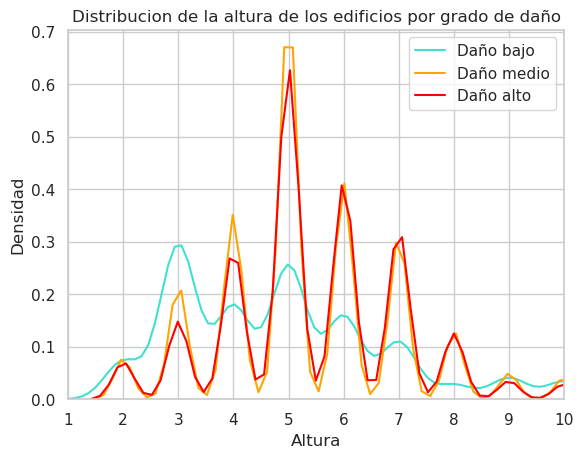

In [79]:
g = sns.kdeplot(values[values['damage_grade'] == 1]['height_percentage'],color='turquoise',label='Daño bajo',shade=False)
g = sns.kdeplot(values[values['damage_grade'] == 2]['height_percentage'],color='orange',label='Daño medio',shade=False)
g = sns.kdeplot(values[values['damage_grade'] == 3]['height_percentage'],color='red',label='Daño alto',shade=False)
g.set(xlim=(1,10))
plt.legend()
g.set_title('Distribucion de la altura de los edificios por grado de daño')
g.set_xlabel('Altura')
g.set_ylabel('Densidad')

# Antiguedad

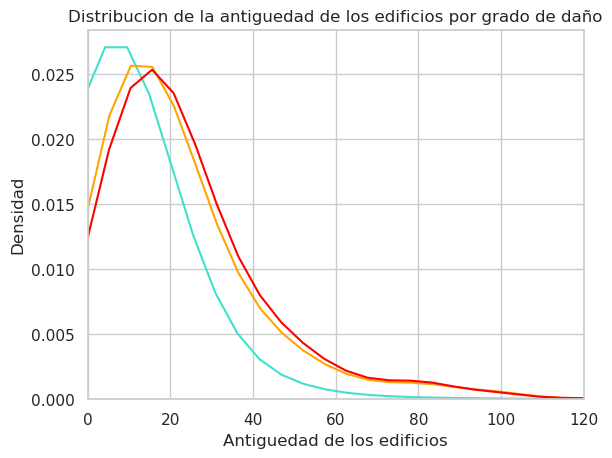

In [90]:
g = sns.kdeplot(values[values['damage_grade'] == 1]['age'],color='turquoise',label='Daño bajo',shade=False)
g = sns.kdeplot(values[values['damage_grade'] == 2]['age'],color='orange',label='Daño bajo',shade=False)
g = sns.kdeplot(values[values['damage_grade'] == 3]['age'],color='red',label='Daño bajo',shade=False)
g.set(xlim=(0,120))
g.set_ylabel("Densidad")
g.set_xlabel("Antiguedad de los edificios")
g.set_title("Distribucion de la antiguedad de los edificios por grado de daño")
plt.show()

In [106]:
top10MasDañadasEdad = dict(values["age"].value_counts().nlargest(20))
edad_mas_dañadas = sorted(list(top10MasDañadasEdad.keys()))
daño_por_edad = values.groupby(["age","damage_grade"]).agg({"cantidad" : "count"})
daño_por_edad.reset_index(inplace = True)
daño_por_edad
edad_low = []
edad_medium = []
edad_high = []
for i in range(0,len(daño_por_edad)):
    if daño_por_edad.loc[i,"age"] in edad_mas_dañadas:
        if (daño_por_edad.loc[i,"damage_grade"] == 1):
            edad_low.append(daño_por_edad.loc[i,"cantidad"])
        elif (daño_por_edad.loc[i,"damage_grade"] == 2):
            edad_medium.append(daño_por_edad.loc[i,"cantidad"])
        elif (daño_por_edad.loc[i,"damage_grade"] == 3):
            edad_high.append(daño_por_edad.loc[i,"cantidad"])

labels = ["0", "5", "10","15", "20", "25", "30", "35", "40", "45","50", "55", "60", "65", "70", "80", "85", "90", "100", "995"]
len(labels)

20

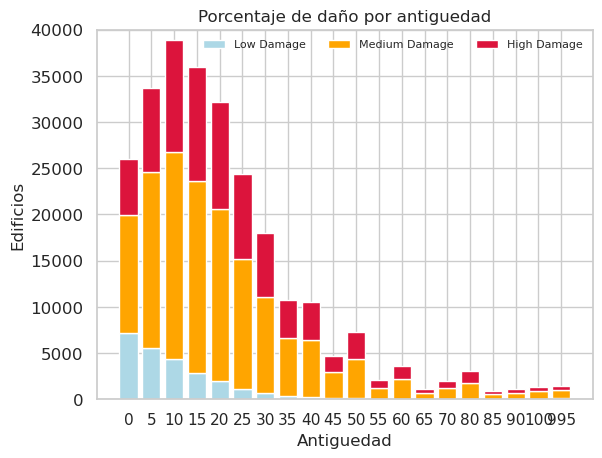

In [109]:
my_colors = ['lightblue','orange','crimson']
labels = ["0", "5", "10","15", "20", "25", "30", "35", "40", "45","50", "55", "60", "65", "70", "80", "85", "90", "100", "995"]
header = ["Low Damage","Medium Damage","High Damage"]
dataset= [edad_low,edad_medium,edad_high]

p1 = plt.bar(labels, dataset[0], color='lightblue',label = 'Low Damage')
p2 = plt.bar(labels, dataset[1], bottom=dataset[0], color='orange',label = 'Medium Damage')
p3 = plt.bar(labels, dataset[2], bottom= np.array(dataset[0])+np.array(dataset[1]), color='crimson',label = 'High Damage')

plt.ylim([0,40000])
plt.title("Porcentaje de daño por antiguedad",fontsize = 12)
plt.yticks(fontsize=12)
plt.ylabel("Edificios", fontsize=12)
plt.xlabel('Antiguedad', fontsize=12)
plt.legend((p1[0], p2[0], p3[0]), (header[0], header[1], header[2]), fontsize=8, ncol=3, framealpha=0, fancybox=True)
plt.show()